# Analyzing MMS Data with pySPEDAS
December 1, 2021

Eric Grimes - egrimes@igpp.ucla.edu

Link to this Colab:
https://colab.research.google.com/drive/109klOxpmBY5ow6wJyBnTYGrk4zIkWSwK?usp=sharing

The video recording of this webinar is available at:
https://youtu.be/OL46rF22niA

Tentative agenda:
- Introduction to the new matplotlib version of pyspedas:
- Ephemeris/coordinates data
- FIELDS data
- Energetic particle data (FEEPS/EIS)
- Plasma data (FPI/HPCA)
- Saving figures


Note: this webinar will be recorded and posted on Youtube after the presentation

## Introduction to the new matplotlib version of pyspedas

Several examples can be found at:

https://github.com/MAVENSDC/PyTplot/blob/matplotlib-backend/docs/PyTplot%20examples%20with%20matplotlib.ipynb

In [ ]:
!pip install pyspedas

In [ ]:
import pyspedas
from pyspedas import tplot

Please see our GitHub page to see how to get started  (including setting up a virtual environment, installing pyspedas, and specifying your local data directories):

https://github.com/spedas/pyspedas

We have additional examples at:

https://github.com/spedas/mms-examples

**Note**:
The matplotlib backend to pyspedas supports burst and SRoI segment bars, e.g., 

In [ ]:
from pyspedas.projects.mms.mms_load_brst_segments import mms_load_brst_segments
from pyspedas.projects.mms.mms_load_fast_segments import mms_load_fast_segments
from pyspedas.projects.mms.mms_load_sroi_segments import mms_load_sroi_segments

mms_load_brst_segments(trange=['2015-10-16', '2015-10-17'])
mms_load_fast_segments(trange=['2015-10-16', '2015-10-17'])
mms_load_sroi_segments(trange=['2015-10-16', '2015-10-17'], probe=1)

## Ephemeris/coordinates data

The load routines in pySPEDAS all follow the format:

`pyspedas.mission.instrument()`

and accept several keywords for controlling which data are loaded; some of the standard keywords for MMS are:

- trange: time range of interest.
- probe: spacecraft # (or array of S/C numbers - [1, 2, 3, 4])
- data_rate: srvy, fast or brst
- datatype: depends on the instrument
- level: L2 (also available: l1b, l1a, sitl, ql - non-L2 requires MMS team user/password)
- time_clip: clip the data down to the time range specified in trange (e.g., time_clip=True)
- spdf: load data from SPDF instead of the LASP SDC
- available: returns a list of files available at the SDC for the requested parameters

Each keyword has a default - so calling `pyspedas.mission.instrument()` should load some data. For a full list of the available keywords, call help() on the function you're interested in, e.g., 

In [ ]:
help(pyspedas.projects.mms.mec)

Help on function mms_load_mec in module pyspedas.mms.print_vars:

mms_load_mec(*args, **kwargs)
    This function loads MEC data into tplot variables
    
    Parameters
    ----------
        trange : list of str
            time range of interest [starttime, endtime] with the format 
            'YYYY-MM-DD','YYYY-MM-DD'] or to specify more or less than a day 
            ['YYYY-MM-DD/hh:mm:ss','YYYY-MM-DD/hh:mm:ss']
    
        probe : str or list of str
            list of probes, valid values for MMS probes are ['1','2','3','4']. 
    
        data_rate : str or list of str
            instrument data rates for MEC include ['brst', 'srvy']. The
            default is 'srvy'.
    
        level : str
            indicates level of data processing. the default if no level is specified is 'l2'
    
        datatype : str or list of str
            Valid datatypes for MEC are: ['ephts04d', 'epht89q', 'epht89d']; default is 'epht89q'
    
        get_support_data: bool
            Dat

### MEC

To get started, let's load some survey mode MEC (MMS Ephemeris and Coordinates) data for all 4 probes

In [ ]:
pyspedas.projects.mms.mec(trange=['2015-10-16', '2015-10-17'], probe=[1, 2, 3, 4])

SDC username (blank for public access): 


01-Dec-21 17:49:56: /usr/local/lib/python3.7/dist-packages/pyspedas/mms/mms_login_lasp.py:69: ResourceWarning: unclosed file <_io.BufferedWriter name='/root/mms_auth_info.pkl'>
  saved_auth = pickle.dump({'user': user, 'passwd': passwd}, open(os.sep.join([homedir, 'mms_auth_info.pkl']), 'wb'))

01-Dec-21 17:49:56: Downloading mms1_mec_srvy_l2_epht89q_20151016_v2.0.0.cdf to pydata/mms1/mec/srvy/l2/epht89q/2015/10
01-Dec-21 17:49:57: Downloading mms2_mec_srvy_l2_epht89q_20151016_v2.0.0.cdf to pydata/mms2/mec/srvy/l2/epht89q/2015/10
01-Dec-21 17:49:57: Downloading mms3_mec_srvy_l2_epht89q_20151016_v2.0.0.cdf to pydata/mms3/mec/srvy/l2/epht89q/2015/10
01-Dec-21 17:49:57: Downloading mms4_mec_srvy_l2_epht89q_20151016_v2.0.0.cdf to pydata/mms4/mec/srvy/l2/epht89q/2015/10


Loaded variables:
mms1_mec_dipole_tilt
mms1_mec_gmst
mms1_mec_mlat
mms1_mec_mlt
mms1_mec_l_dipole
mms1_mec_quat_eci_to_bcs
mms1_mec_quat_eci_to_dbcs
mms1_mec_quat_eci_to_dmpa
mms1_mec_quat_eci_to_smpa
mms1_mec_quat_eci_to_dsl
mms1_mec_quat_eci_to_ssl
mms1_mec_L_vec
mms1_mec_Z_vec
mms1_mec_P_vec
mms1_mec_L_phase
mms1_mec_Z_phase
mms1_mec_P_phase
mms1_mec_kp
mms1_mec_dst
mms1_mec_earth_eclipse_flag
mms1_mec_moon_eclipse_flag
mms1_mec_r_eci
mms1_mec_v_eci
mms1_mec_r_gsm
mms1_mec_v_gsm
mms1_mec_quat_eci_to_gsm
mms1_mec_r_geo
mms1_mec_v_geo
mms1_mec_quat_eci_to_geo
mms1_mec_r_sm
mms1_mec_v_sm
mms1_mec_quat_eci_to_sm
mms1_mec_r_gse
mms1_mec_v_gse
mms1_mec_quat_eci_to_gse
mms1_mec_r_gse2000
mms1_mec_v_gse2000
mms1_mec_quat_eci_to_gse2000
mms1_mec_geod_lat
mms1_mec_geod_lon
mms1_mec_geod_height
mms1_mec_r_sun_de421_eci
mms1_mec_r_moon_de421_eci
mms1_mec_fieldline_type
mms1_mec_bsc_gsm
mms1_mec_loss_cone_angle_s
mms1_mec_loss_cone_angle_n
mms1_mec_pfs_geod_latlon
mms1_mec_pfn_geod_latlon
mms1_m

['mms1_mec_dipole_tilt',
 'mms1_mec_gmst',
 'mms1_mec_mlat',
 'mms1_mec_mlt',
 'mms1_mec_l_dipole',
 'mms1_mec_quat_eci_to_bcs',
 'mms1_mec_quat_eci_to_dbcs',
 'mms1_mec_quat_eci_to_dmpa',
 'mms1_mec_quat_eci_to_smpa',
 'mms1_mec_quat_eci_to_dsl',
 'mms1_mec_quat_eci_to_ssl',
 'mms1_mec_L_vec',
 'mms1_mec_Z_vec',
 'mms1_mec_P_vec',
 'mms1_mec_L_phase',
 'mms1_mec_Z_phase',
 'mms1_mec_P_phase',
 'mms1_mec_kp',
 'mms1_mec_dst',
 'mms1_mec_earth_eclipse_flag',
 'mms1_mec_moon_eclipse_flag',
 'mms1_mec_r_eci',
 'mms1_mec_v_eci',
 'mms1_mec_r_gsm',
 'mms1_mec_v_gsm',
 'mms1_mec_quat_eci_to_gsm',
 'mms1_mec_r_geo',
 'mms1_mec_v_geo',
 'mms1_mec_quat_eci_to_geo',
 'mms1_mec_r_sm',
 'mms1_mec_v_sm',
 'mms1_mec_quat_eci_to_sm',
 'mms1_mec_r_gse',
 'mms1_mec_v_gse',
 'mms1_mec_quat_eci_to_gse',
 'mms1_mec_r_gse2000',
 'mms1_mec_v_gse2000',
 'mms1_mec_quat_eci_to_gse2000',
 'mms1_mec_geod_lat',
 'mms1_mec_geod_lon',
 'mms1_mec_geod_height',
 'mms1_mec_r_sun_de421_eci',
 'mms1_mec_r_moon_de421_eci

Plot the position data in SM coordinates

Note: tplot accepts the unix-style wildcards for strings: ? (match a single character) and * (match multiple characters)

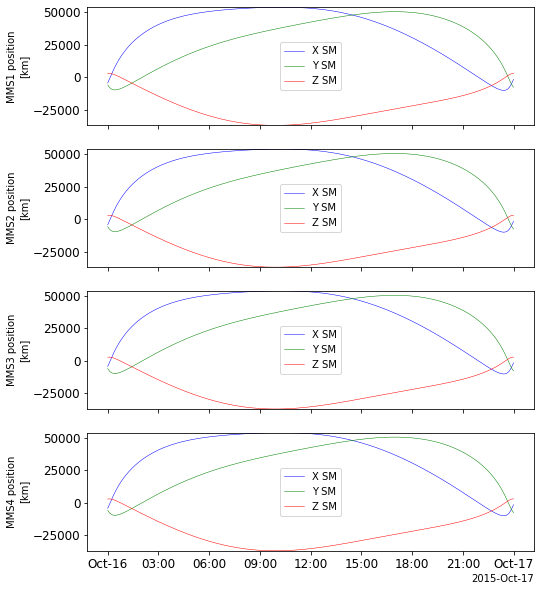

In [ ]:
tplot('mms?_mec_r_sm')

List the tplot variables loaded

In [ ]:
from pyspedas import tplot_names

tvars = tplot_names()

0 : mms_bss_burst
1 : mms1_mec_dipole_tilt
2 : mms1_mec_gmst
3 : mms1_mec_mlat
4 : mms1_mec_mlt
5 : mms1_mec_l_dipole
6 : mms1_mec_quat_eci_to_bcs
7 : mms1_mec_quat_eci_to_dbcs
8 : mms1_mec_quat_eci_to_dmpa
9 : mms1_mec_quat_eci_to_smpa
10 : mms1_mec_quat_eci_to_dsl
11 : mms1_mec_quat_eci_to_ssl
12 : mms1_mec_L_vec
13 : mms1_mec_Z_vec
14 : mms1_mec_P_vec
15 : mms1_mec_L_phase
16 : mms1_mec_Z_phase
17 : mms1_mec_P_phase
18 : mms1_mec_kp
19 : mms1_mec_dst
20 : mms1_mec_earth_eclipse_flag
21 : mms1_mec_moon_eclipse_flag
22 : mms1_mec_r_eci
23 : mms1_mec_v_eci
24 : mms1_mec_r_gsm
25 : mms1_mec_v_gsm
26 : mms1_mec_quat_eci_to_gsm
27 : mms1_mec_r_geo
28 : mms1_mec_v_geo
29 : mms1_mec_quat_eci_to_geo
30 : mms1_mec_r_sm
31 : mms1_mec_v_sm
32 : mms1_mec_quat_eci_to_sm
33 : mms1_mec_r_gse
34 : mms1_mec_v_gse
35 : mms1_mec_quat_eci_to_gse
36 : mms1_mec_r_gse2000
37 : mms1_mec_v_gse2000
38 : mms1_mec_quat_eci_to_gse2000
39 : mms1_mec_geod_lat
40 : mms1_mec_geod_lon
41 : mms1_mec_geod_height
42 : m

Include the burst mode bar

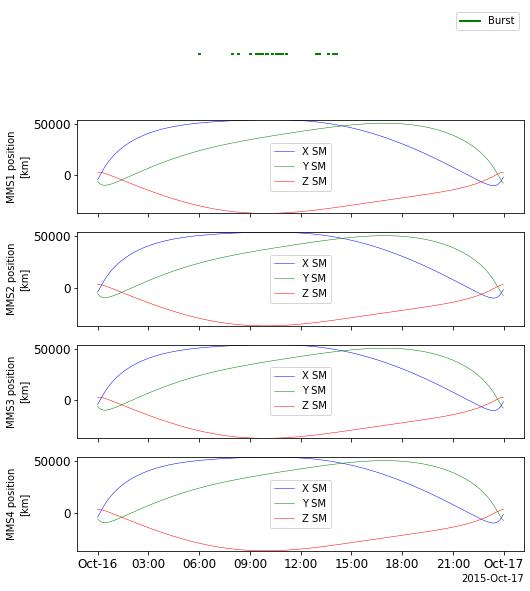

In [ ]:
tplot(['mms_bss_burst', 
       'mms1_mec_r_sm', 
       'mms2_mec_r_sm', 
       'mms3_mec_r_sm', 
       'mms4_mec_r_sm'])

Extract the data from a tplot variable

In [ ]:
from pyspedas import get_data

data = get_data('mms1_mec_r_sm')

The time values are stored in data.times:

Note: these are unix times (number of seconds since 1 Jan 1970, excluding leap seconds)


In [ ]:
data.times

array([1.44495360e+09, 1.44495363e+09, 1.44495366e+09, ...,
       1.44503991e+09, 1.44503994e+09, 1.44503997e+09])

To convert from unix time to a string, use time_string, e.g., 

In [ ]:
from pyspedas import time_string

time_string(data.times[0])

'2015-10-16 00:00:00.000000'

You can convert strings to unix times using time_double, e.g., 

In [ ]:
from pyspedas import time_double

time_double('2015-10-16')

1444953600.0

To convert a string or unix time to a datetime object, you can use time_datetime, e.g., 

In [ ]:
from pyspedas import time_datetime

time_datetime('2015-10-16')

datetime.datetime(2015, 10, 16, 0, 0, tzinfo=datetime.timezone.utc)

**Note**: if you're using datetime objects, be sure to set the time zone to UTC

The data values are stored in data.y:



In [ ]:
data.y.shape

(100, 3)

The metadata can be returned by setting the 'metadata' keyword to True

In [ ]:
metadata = get_data('mms1_mec_r_sm', metadata=True)

metadata

{'CDF': {'FILENAME': 'pydata/mms1/mec/srvy/l2/epht89q/2015/10/mms1_mec_srvy_l2_epht89q_20151016_v2.0.0.cdf',
  'GATT': {'ADID_ref': ' ',
   'Command_line': '/mms/MMScode/MmsEphemFromFdoa -S 20151016 -E 20151016 -b MMS1 -e T89Q -D 30 -v 0 /mms/fdoa_eph_att/defeph/%b/%YYYY/%B_DEFEPH_%YYYY%MM%DD.%V /mms/fdoa_eph_att/defatt/%b/%YYYY/%B_DEFATT_%YYYY%MM%DD.%V /mms/l2_eph_att_survey/%b/%YYYY/%b_mec_srvy_l2_epht89q_%YYYY%MM%DD_%v ',
   'Data_type': 'srvy_l2_epht89q',
   'Data_version': '1.0.0',
   'Descriptor': 'MEC>Magnetic Ephemeris and Coordinates',
   'Discipline': 'Space Physics>Magnetospheric Science',
   'File_naming_convention': 'source_descriptor_datatype_yyyyMMdd',
   'Generated_by': 'M. G. Henderson and S. K. Morley, Los Alamos National Laboratory',
   'Generation_date': '20160401',
   'Generation_datetime': '2016-04-01T22:01:03Z',
   'HTTP_LINK': ['http://mms.gsfc.nasa.gov/',
    'http://lasp.colorado.edu/mms/sdc/'],
   'INTL_DESIG': '2015-011A',
   'Instrument_type': 'Ephemeris/At

Create a tplot variable using `store_data`


Note: to preserve the metadata from a previous tplot variable, use the optional keyword `attr_dict`

In [ ]:
from pyspedas import store_data

store_data('my_new_pos_var', data={'x': data.times, 'y': data.y}, attr_dict=metadata)

True

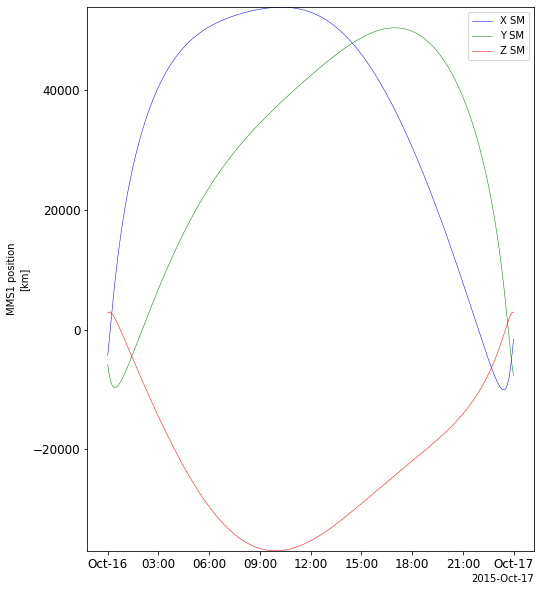

In [ ]:
tplot('my_new_pos_var')

To change the plot options for a particular variable, use the `options` function

In [ ]:
from pyspedas import options

options('my_new_pos_var', 'legend_names', ['x', 'y', 'z'])
options('my_new_pos_var', 'ytitle', 'Position data')
options('my_new_pos_var', 'ysubtitle', 'km')

In [ ]:
help(options)

Help on function options in module pytplot.options:

options(name, option=None, value=None, opt_dict=None)
    This function allows the user to set a large variety of options for individual plots.
    
    Parameters:
        name : str
            Name or number of the tplot variable
        option : str
            The name of the option.  See section below.
        value : str/int/float/list
            The value of the option.  See section below.
        dict : dict
            This can be a dictionary of option:value pairs.  Option and value
            will not be needed if this dictionary item is supplied.
    
    Options:
        =================== ==========   =====
        Options             Value type   Notes
        =================== ==========   =====
        Color               str/list     red, green, blue, etc.  Also takes in RGB tuples, i.e. (0,255,0) for green
        Colormap            str/list     https://matplotlib.org/examples/color/colormaps_reference.html.

To change global plot options, use `tplot_options`

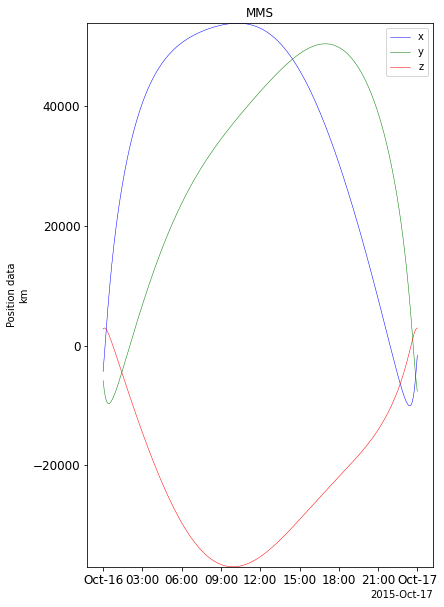

In [ ]:
from pyspedas import tplot_options

tplot_options('title', 'MMS')
tplot_options('xmargin', [0.2, 0.2])

tplot('my_new_pos_var')

You can change the figure size with the 'xsize' and 'ysize' options (specified in inches)

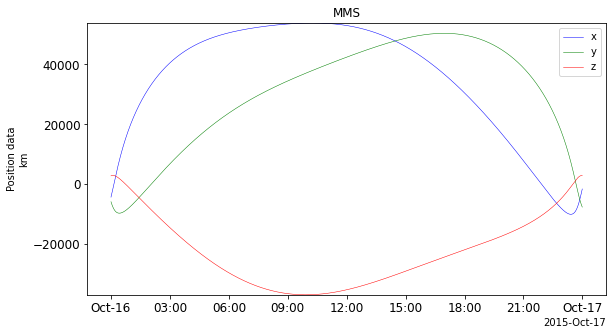

In [ ]:
tplot('my_new_pos_var', xsize=12, ysize=5)

Create orbit plots

01-Dec-21 17:51:02: Loading pydata/mms1/mec/srvy/l2/epht89q/2015/10/mms1_mec_srvy_l2_epht89q_20151016_v2.0.0.cdf
01-Dec-21 17:51:02: Loading pydata/mms2/mec/srvy/l2/epht89q/2015/10/mms2_mec_srvy_l2_epht89q_20151016_v2.0.0.cdf
01-Dec-21 17:51:02: Loading pydata/mms3/mec/srvy/l2/epht89q/2015/10/mms3_mec_srvy_l2_epht89q_20151016_v2.0.0.cdf
01-Dec-21 17:51:02: Loading pydata/mms4/mec/srvy/l2/epht89q/2015/10/mms4_mec_srvy_l2_epht89q_20151016_v2.0.0.cdf


Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Loaded variables:
mms1_mec_r_gse
mms1_mec_r_gse2000
mms2_mec_r_gse
mms2_mec_r_gse2000
mms3_mec_r_gse
mms3_mec_r_gse2000
mms4_mec_r_gse
mms4_mec_r_gse2000


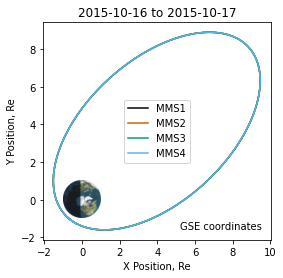

In [ ]:
from pyspedas.projects.mms.mms_orbit_plot import mms_orbit_plot

mms_orbit_plot(trange=['2015-10-16', '2015-10-17'])

In [ ]:
help(mms_orbit_plot)

Help on function mms_orbit_plot in module pyspedas.mms.mms_orbit_plot:

mms_orbit_plot(trange=['2015-10-16', '2015-10-17'], probes=[1, 2, 3, 4], data_rate='srvy', xr=None, yr=None, plane='xy', coord='gse')
    This function creates MMS orbit plots
    
    Parameters:
        trange : list of str
            time range of interest [starttime, endtime] with the format 
            'YYYY-MM-DD','YYYY-MM-DD'] or to specify more or less than a day 
            ['YYYY-MM-DD/hh:mm:ss','YYYY-MM-DD/hh:mm:ss']
    
        probe: list of str
            probe #, e.g., '4' for MMS4
    
        data_rate: str
            instrument data rate, e.g., 'srvy' or 'brst'
    
        plane: str
            coordinate plane to plot (options: 'xy', 'yz', 'xz')
    
        xr: list of float
            two element list specifying x-axis range
    
        yr: list of float
            two element list specifying y-axis range
    
        coord: str
            coordinate system


## FIELDS data

### FGM

To load some FGM data:

In [ ]:
trange = ['2016-11-23/07:49:32', '2016-11-23/07:49:35']

pyspedas.projects.mms.fgm(trange=trange, data_rate='brst', probe=[1, 2, 3, 4], time_clip=True)

01-Dec-21 17:51:59: Downloading mms1_fgm_brst_l2_20161123074814_v5.87.0.cdf to pydata/mms1/fgm/brst/l2/2016/11/23
01-Dec-21 17:52:00: Downloading mms2_fgm_brst_l2_20161123074814_v5.87.0.cdf to pydata/mms2/fgm/brst/l2/2016/11/23
01-Dec-21 17:52:00: Downloading mms3_fgm_brst_l2_20161123074814_v5.87.0.cdf to pydata/mms3/fgm/brst/l2/2016/11/23
01-Dec-21 17:52:01: Downloading mms4_fgm_brst_l2_20161123074814_v5.87.0.cdf to pydata/mms4/fgm/brst/l2/2016/11/23


Time clip was applied to: mms1_fgm_b_gse_brst_l2
Time clip was applied to: mms1_fgm_b_gsm_brst_l2
Time clip was applied to: mms1_fgm_b_dmpa_brst_l2
Time clip was applied to: mms1_fgm_b_bcs_brst_l2
Time clip was applied to: mms1_fgm_flag_brst_l2
Problem time clipping: mms1_fgm_r_gse_brst_l2
Problem time clipping: mms1_fgm_r_gsm_brst_l2
Time clip was applied to: mms1_fgm_hirange_brst_l2
Time clip was applied to: mms1_fgm_bdeltahalf_brst_l2
Time clip was applied to: mms1_fgm_stemp_brst_l2
Time clip was applied to: mms1_fgm_etemp_brst_l2
Time clip was applied to: mms1_fgm_mode_brst_l2
Problem time clipping: mms1_fgm_rdeltahalf_brst_l2
Time clip was applied to: mms2_fgm_b_gse_brst_l2
Time clip was applied to: mms2_fgm_b_gsm_brst_l2
Time clip was applied to: mms2_fgm_b_dmpa_brst_l2
Time clip was applied to: mms2_fgm_b_bcs_brst_l2
Time clip was applied to: mms2_fgm_flag_brst_l2
Problem time clipping: mms2_fgm_r_gse_brst_l2
Problem time clipping: mms2_fgm_r_gsm_brst_l2
Time clip was applied to

['Epoch',
 'mms1_fgm_b_gse_brst_l2',
 'mms1_fgm_b_gsm_brst_l2',
 'mms1_fgm_b_dmpa_brst_l2',
 'mms1_fgm_b_bcs_brst_l2',
 'mms1_fgm_flag_brst_l2',
 'Epoch_state',
 'mms1_fgm_hirange_brst_l2',
 'mms1_fgm_bdeltahalf_brst_l2',
 'mms1_fgm_stemp_brst_l2',
 'mms1_fgm_etemp_brst_l2',
 'mms1_fgm_mode_brst_l2',
 'mms1_fgm_rdeltahalf_brst_l2',
 'mms2_fgm_b_gse_brst_l2',
 'mms2_fgm_b_gsm_brst_l2',
 'mms2_fgm_b_dmpa_brst_l2',
 'mms2_fgm_b_bcs_brst_l2',
 'mms2_fgm_flag_brst_l2',
 'mms2_fgm_hirange_brst_l2',
 'mms2_fgm_bdeltahalf_brst_l2',
 'mms2_fgm_stemp_brst_l2',
 'mms2_fgm_etemp_brst_l2',
 'mms2_fgm_mode_brst_l2',
 'mms2_fgm_rdeltahalf_brst_l2',
 'mms3_fgm_b_gse_brst_l2',
 'mms3_fgm_b_gsm_brst_l2',
 'mms3_fgm_b_dmpa_brst_l2',
 'mms3_fgm_b_bcs_brst_l2',
 'mms3_fgm_flag_brst_l2',
 'mms3_fgm_hirange_brst_l2',
 'mms3_fgm_bdeltahalf_brst_l2',
 'mms3_fgm_stemp_brst_l2',
 'mms3_fgm_etemp_brst_l2',
 'mms3_fgm_mode_brst_l2',
 'mms3_fgm_rdeltahalf_brst_l2',
 'mms4_fgm_b_gse_brst_l2',
 'mms4_fgm_b_gsm_brst_l

We want to do curlometer calculations, so we'll need MEC data as well

In [ ]:
pyspedas.projects.mms.mec(trange=trange, data_rate='brst', probe=[1, 2, 3, 4], time_clip=True)

01-Dec-21 17:52:08: Downloading mms1_mec_brst_l2_epht89q_20161123074815_v2.2.0.cdf to pydata/mms1/mec/brst/l2/epht89q/2016/11/23
01-Dec-21 17:52:08: Downloading mms2_mec_brst_l2_epht89q_20161123074815_v2.2.0.cdf to pydata/mms2/mec/brst/l2/epht89q/2016/11/23
01-Dec-21 17:52:11: Downloading mms3_mec_brst_l2_epht89q_20161123074815_v2.2.0.cdf to pydata/mms3/mec/brst/l2/epht89q/2016/11/23
01-Dec-21 17:52:12: Downloading mms4_mec_brst_l2_epht89q_20161123074815_v2.2.0.cdf to pydata/mms4/mec/brst/l2/epht89q/2016/11/23


Time clip was applied to: mms1_mec_dipole_tilt
Time clip was applied to: mms1_mec_gmst
Time clip was applied to: mms1_mec_mlat
Time clip was applied to: mms1_mec_mlt
Time clip was applied to: mms1_mec_l_dipole
Time clip was applied to: mms1_mec_quat_eci_to_bcs
Time clip was applied to: mms1_mec_quat_eci_to_dbcs
Time clip was applied to: mms1_mec_quat_eci_to_dmpa
Time clip was applied to: mms1_mec_quat_eci_to_smpa
Time clip was applied to: mms1_mec_quat_eci_to_dsl
Time clip was applied to: mms1_mec_quat_eci_to_ssl
Time clip was applied to: mms1_mec_L_vec
Time clip was applied to: mms1_mec_Z_vec
Time clip was applied to: mms1_mec_P_vec
Time clip was applied to: mms1_mec_L_phase
Time clip was applied to: mms1_mec_Z_phase
Time clip was applied to: mms1_mec_P_phase
Time clip was applied to: mms1_mec_kp
Time clip was applied to: mms1_mec_dst
Time clip was applied to: mms1_mec_earth_eclipse_flag
Time clip was applied to: mms1_mec_moon_eclipse_flag
Time clip was applied to: mms1_mec_r_eci
Time

['mms1_mec_dipole_tilt',
 'mms1_mec_gmst',
 'mms1_mec_mlat',
 'mms1_mec_mlt',
 'mms1_mec_l_dipole',
 'mms1_mec_quat_eci_to_bcs',
 'mms1_mec_quat_eci_to_dbcs',
 'mms1_mec_quat_eci_to_dmpa',
 'mms1_mec_quat_eci_to_smpa',
 'mms1_mec_quat_eci_to_dsl',
 'mms1_mec_quat_eci_to_ssl',
 'mms1_mec_L_vec',
 'mms1_mec_Z_vec',
 'mms1_mec_P_vec',
 'mms1_mec_L_phase',
 'mms1_mec_Z_phase',
 'mms1_mec_P_phase',
 'mms1_mec_kp',
 'mms1_mec_dst',
 'mms1_mec_earth_eclipse_flag',
 'mms1_mec_moon_eclipse_flag',
 'mms1_mec_r_eci',
 'mms1_mec_v_eci',
 'mms1_mec_r_gsm',
 'mms1_mec_v_gsm',
 'mms1_mec_quat_eci_to_gsm',
 'mms1_mec_r_geo',
 'mms1_mec_v_geo',
 'mms1_mec_quat_eci_to_geo',
 'mms1_mec_r_sm',
 'mms1_mec_v_sm',
 'mms1_mec_quat_eci_to_sm',
 'mms1_mec_r_gse',
 'mms1_mec_v_gse',
 'mms1_mec_quat_eci_to_gse',
 'mms1_mec_r_gse2000',
 'mms1_mec_v_gse2000',
 'mms1_mec_quat_eci_to_gse2000',
 'mms1_mec_geod_lat',
 'mms1_mec_geod_lon',
 'mms1_mec_geod_height',
 'mms1_mec_r_sun_de421_eci',
 'mms1_mec_r_moon_de421_eci

Plot the FGM data for all 4 spacecraft

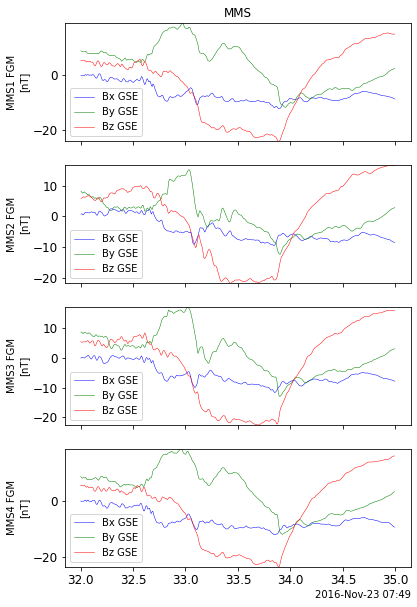

In [ ]:
tplot(['mms1_fgm_b_gse_brst_l2_bvec', 
       'mms2_fgm_b_gse_brst_l2_bvec', 
       'mms3_fgm_b_gse_brst_l2_bvec', 
       'mms4_fgm_b_gse_brst_l2_bvec'])

We have routines for calculating the cross product and dot product of two tplot variables:

In [ ]:
from pyspedas.analysis.tcrossp import tcrossp
from pyspedas.analysis.tdotp import tdotp

Calculate B dot B for MMS 1


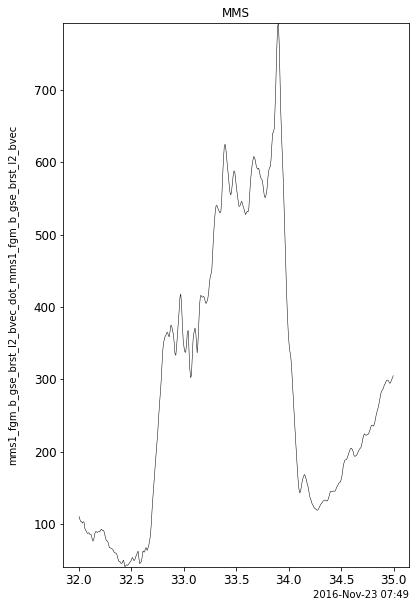

In [ ]:
tdotp('mms1_fgm_b_gse_brst_l2_bvec', 'mms1_fgm_b_gse_brst_l2_bvec')
tplot('mms1_fgm_b_gse_brst_l2_bvec_dot_mms1_fgm_b_gse_brst_l2_bvec')

Calculate B cross B

01-Dec-21 17:52:42: /usr/local/lib/python3.7/dist-packages/pytplot/MPLPlotter/tplot.py:145: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  this_axis.set_ylim(yrange)



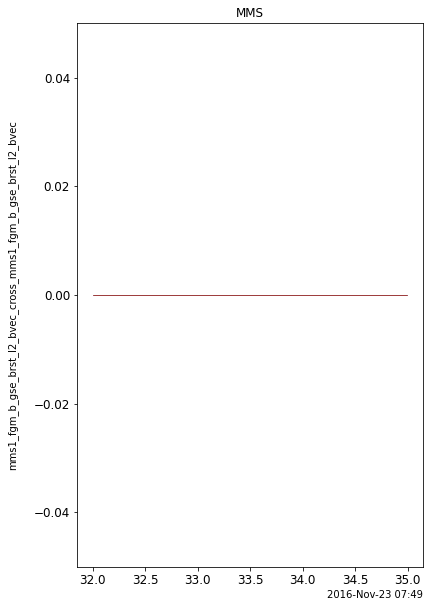

In [ ]:
tcrossp('mms1_fgm_b_gse_brst_l2_bvec', 'mms1_fgm_b_gse_brst_l2_bvec')
tplot('mms1_fgm_b_gse_brst_l2_bvec_cross_mms1_fgm_b_gse_brst_l2_bvec')

#### Curlometer calculations

To do curlometer calculations, you can import the curlometer function from `pyspedas.projects.mms`

In [ ]:
from pyspedas.projects.mms import curlometer

In [ ]:
help(curlometer)

Help on function mms_curl in module pyspedas.mms.fgm.mms_curl:

mms_curl(fields=None, positions=None, suffix='')
    This function applies the curlometer technique to MMS FGM data
    
    Parameters
    ----------
        fields : list of str
            List of tplot variables containing the B-field for each spacecraft 
            (in GSE coordinates)
    
        positions : list of str
            List of tplot variables containing the S/C position vectors for 
            each spacecraft (also GSE coordinates) 
    
        suffix: str
            The tplot variable names will be given this suffix.  By default, 
            no suffix is added.
    
    Notes
    ----------
        The input B-field data and position data are required to be in 
        GSE coordinates
    
        Based on the original mms_curl, written in IDL, by Jonathan Eastwood 
    
        For more info on this method, see:
          Chanteur, G., Spatial Interpolation for Four Spacecraft: Theory, 
         

In [ ]:
curlometer(fields=['mms1_fgm_b_gse_brst_l2_bvec', 'mms2_fgm_b_gse_brst_l2_bvec', 'mms3_fgm_b_gse_brst_l2_bvec', 'mms4_fgm_b_gse_brst_l2_bvec'],
           positions=['mms1_mec_r_gse', 'mms2_mec_r_gse', 'mms3_mec_r_gse', 'mms4_mec_r_gse'])

tinterpol (linear) was applied to: mms2_fgm_b_gse_brst_l2_bvec_i
tinterpol (linear) was applied to: mms3_fgm_b_gse_brst_l2_bvec_i
tinterpol (linear) was applied to: mms4_fgm_b_gse_brst_l2_bvec_i
tinterpol (linear) was applied to: mms1_mec_r_gse_i
tinterpol (linear) was applied to: mms2_mec_r_gse_i
tinterpol (linear) was applied to: mms3_mec_r_gse_i
tinterpol (linear) was applied to: mms4_mec_r_gse_i


['baryb', 'curlB', 'divB', 'jtotal', 'jpar', 'jperp', 'alpha', 'alphaparallel']

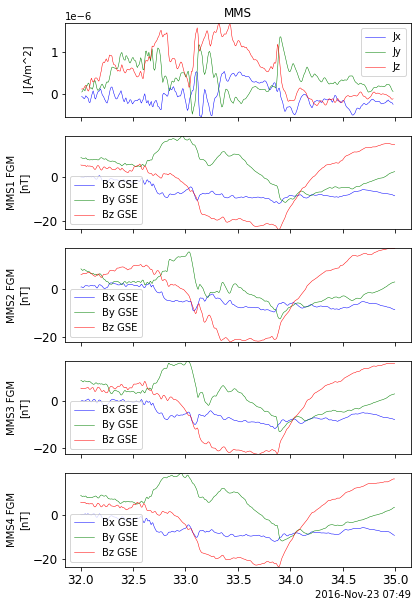

In [ ]:
tplot(['jtotal', 'mms1_fgm_b_gse_brst_l2_bvec', 'mms2_fgm_b_gse_brst_l2_bvec', 'mms3_fgm_b_gse_brst_l2_bvec', 'mms4_fgm_b_gse_brst_l2_bvec'])

### SCM

Load 3 hours of srvy mode L2 SCM data:

In [ ]:
pyspedas.projects.mms.scm(trange=['2015-10-16', '2015-10-16/3:00'], time_clip=True)

01-Dec-21 17:53:11: Downloading mms1_scm_srvy_l2_scsrvy_20151016_v2.2.5.cdf to pydata/mms1/scm/srvy/l2/scsrvy/2015/10


Time clip was applied to: mms1_scm_acb_gse_scsrvy_srvy_l2
Loaded variables:
mms1_scm_acb_gse_scsrvy_srvy_l2


['mms1_scm_acb_gse_scsrvy_srvy_l2']

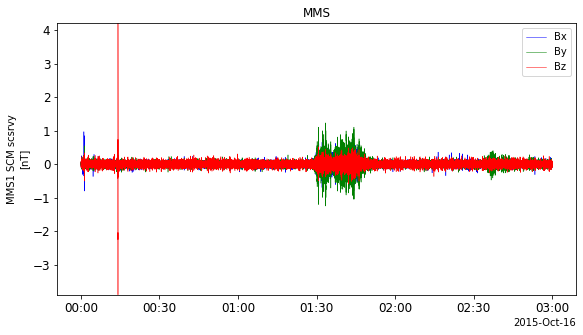

In [ ]:
tplot('mms1_scm_acb_gse_scsrvy_srvy_l2', xsize=12, ysize=5)

#### Dynamic power spectra

Calculate the dynamic power spectra using the SCM data

In [ ]:
from pyspedas import tdpwrspc 

In [ ]:
help(tdpwrspc)

Help on function tdpwrspc in module pyspedas.analysis.tdpwrspc:

tdpwrspc(varname, newname=None, nboxpoints=256, nshiftpoints=128, binsize=3, nohanning=False, noline=False, notperhz=False, notmvariance=False)
    Compute power spectra for a tplot variable.
    
    Parameters
    ----------
    varname: str
        Name of pytplot variable.
    newname: str, optional
        Name of new pytplot variable to save data to.
    nboxpoints: int, optional
        The number of points to use for the hanning window.
        The default is 256.
    nshiftpoints: int, optional
        The number of points to shift for each spectrum.
        The default is 128.
    binsize: int, optional
        Size for binning of the data along the frequency domain.
        The default is 3.
    nohanning: bool, optional
        If True, no hanning window is applied to the input.
        The default is False.
    noline: bool, optional
        If True, no straight line is subtracted.
        The default is Fals

In [ ]:
tdpwrspc('mms1_scm_acb_gse_scsrvy_srvy_l2', nboxpoints=512, nshiftpoints=512, binsize=1)

['mms1_scm_acb_gse_scsrvy_srvy_l2_x_dpwrspc',
 'mms1_scm_acb_gse_scsrvy_srvy_l2_y_dpwrspc',
 'mms1_scm_acb_gse_scsrvy_srvy_l2_z_dpwrspc']

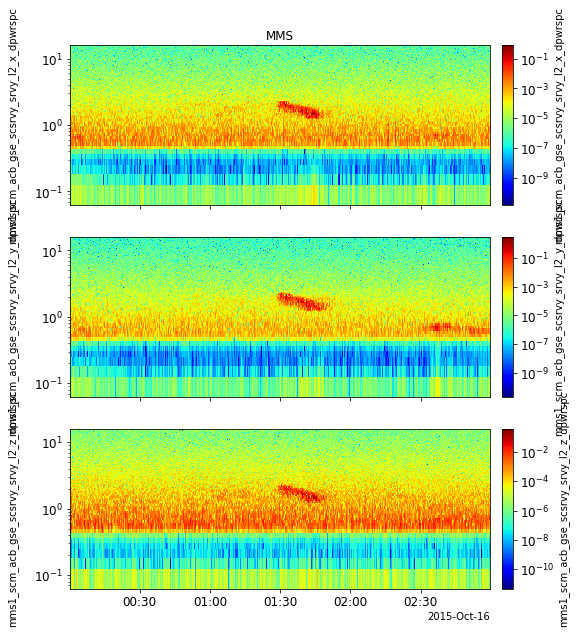

In [ ]:
tplot('mms1_scm_acb_gse_scsrvy_srvy_l2_?_dpwrspc')

To add vertical bars to a figure, use the `timebar` function from `pyspedas`

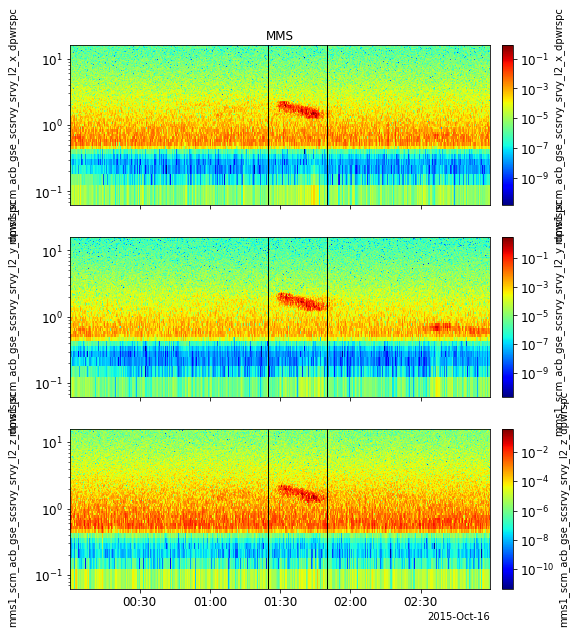

In [ ]:
from pyspedas import timebar

timebar(['2015-10-16 01:25:00', '2015-10-16 01:50:00'])

tplot('mms1_scm_acb_gse_scsrvy_srvy_l2_?_dpwrspc')

In [ ]:
help(timebar)

Help on function timebar in module pytplot.timebar:

timebar(t, varname=None, databar=False, delete=False, color='black', thick=1, dash=False)
    This function will add a vertical bar to all time series plots.  This is useful if you
    want to bring attention to a specific time.  
    
    Parameters:
        t : flt/list
            The time in seconds since Jan 01 1970 to place the vertical bar.  If a list of numbers are supplied,
            multiple bars will be created.  If "databar" is set, then "t" becomes the point on the y axis to 
            place a horizontal bar.  
        varname : str/list, optional
            The variable(s) to add the vertical bar to.  If not set, the default is to add it to all current plots.  
        databar : bool, optional
            This will turn the timebar into a horizontal data bar.  If this is set True, then variable "t" becomes 
            the point on the y axis to place a horizontal bar.  
        delete : bool, optional
            

#### Wave polarization

To do wave polarization calculations, use `twavpol`; there's a notebook showing wavpol calculations at:

https://github.com/spedas/mms-examples/blob/master/advanced/Wave_polarization_using_SCM_data_.ipynb

Note: twavpol requires numpy 1.20.0 or later

### EDP

Load the electric field data and spacecraft potential

In [ ]:
pyspedas.projects.mms.edp(trange=trange, data_rate='brst', datatype=['dce', 'scpot'], time_clip=True)

01-Dec-21 17:53:59: Downloading mms1_edp_brst_l2_dce_20161123074814_v2.2.0.cdf to pydata/mms1/edp/brst/l2/dce/2016/11/23
01-Dec-21 17:54:01: Downloading mms1_edp_brst_l2_scpot_20161123074814_v2.4.0.cdf to pydata/mms1/edp/brst/l2/scpot/2016/11/23


Time clip was applied to: mms1_edp_dce_gse_brst_l2
Time clip was applied to: mms1_edp_dce_dsl_brst_l2
Time clip was applied to: mms1_edp_dce_par_epar_brst_l2
Time clip was applied to: mms1_edp_scpot_brst_l2
Time clip was applied to: mms1_edp_psp_brst_l2
Time clip was applied to: mms1_edp_dcv_brst_l2
Loaded variables:
mms1_edp_dce_gse_brst_l2
mms1_edp_dce_dsl_brst_l2
mms1_edp_dce_par_epar_brst_l2
mms1_edp_scpot_brst_l2
mms1_edp_psp_brst_l2
mms1_edp_dcv_brst_l2


['mms1_edp_dce_gse_brst_l2',
 'mms1_edp_dce_dsl_brst_l2',
 'mms1_edp_dce_par_epar_brst_l2',
 'mms1_edp_scpot_brst_l2',
 'mms1_edp_psp_brst_l2',
 'mms1_edp_dcv_brst_l2']

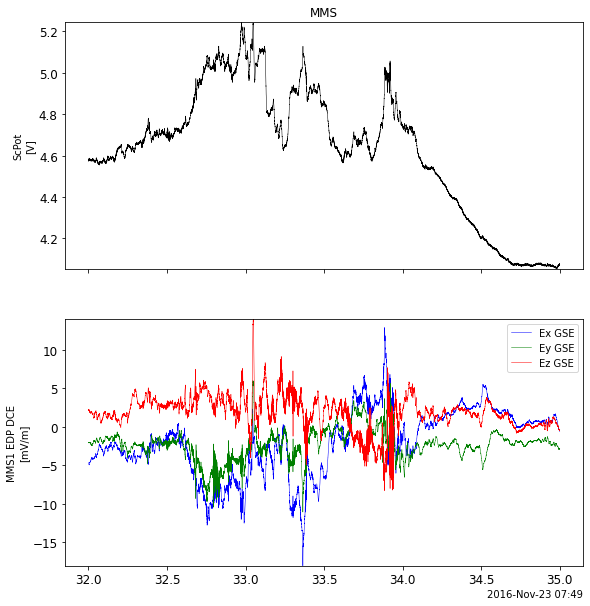

In [ ]:
tplot(['mms1_edp_scpot_brst_l2', 'mms1_edp_dce_gse_brst_l2'], xsize=12)

### EDI

Load data from the Electron Drift Instrument (EDI)

In [ ]:
pyspedas.projects.mms.edi(trange=['2016-11-23', '2016-11-24'])

01-Dec-21 17:54:26: Downloading mms1_edi_srvy_l2_efield_20161123_v1.6.2.cdf to pydata/mms1/edi/srvy/l2/efield/2016/11


Loaded variables:
mms1_edi_vdrift_dsl_srvy_l2
mms1_edi_vdrift_gse_srvy_l2
mms1_edi_vdrift_gsm_srvy_l2
mms1_edi_e_dsl_srvy_l2
mms1_edi_e_gse_srvy_l2
mms1_edi_e_gsm_srvy_l2
mms1_edi_tri_weight_srvy_l2


['mms1_edi_vdrift_dsl_srvy_l2',
 'mms1_edi_vdrift_gse_srvy_l2',
 'mms1_edi_vdrift_gsm_srvy_l2',
 'mms1_edi_e_dsl_srvy_l2',
 'mms1_edi_e_gse_srvy_l2',
 'mms1_edi_e_gsm_srvy_l2',
 'mms1_edi_tri_weight_srvy_l2']

Plot the ExB drift velocity in GSE coordinates

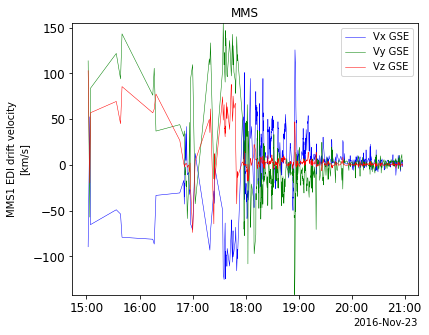

In [ ]:
tplot('mms1_edi_vdrift_gse_srvy_l2', ysize=5)

To zoom into a time range, use `tlimit`

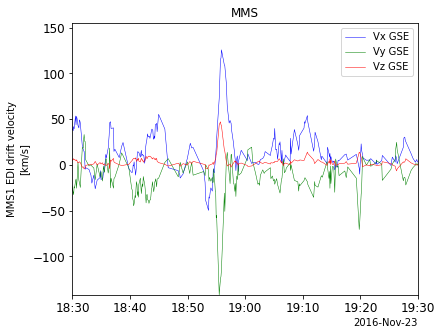

In [ ]:
from pyspedas import tlimit

tlimit(['2016-11-23 18:30:00', '2016-11-23 19:30:00'])

tplot('mms1_edi_vdrift_gse_srvy_l2', ysize=5)

You can reset to the full trange with the `full` keyword, e.g., 


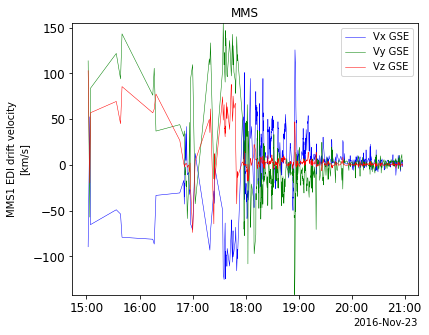

In [ ]:
tlimit(full=True)

tplot('mms1_edi_vdrift_gse_srvy_l2', ysize=5)

### DSP

Load the EPSD/BPSD data from the digital signal processor (DSP)

- BPSD = magnetic power spectral density
- EPSD = electric power spectral density

In [ ]:
pyspedas.projects.mms.dsp(probe=1, trange=['2015-10-16', '2015-10-17'], datatype=['epsd', 'bpsd'], data_rate='fast', level='l2', time_clip=True)

01-Dec-21 17:54:45: Downloading mms1_dsp_fast_l2_epsd_20151016_v0.6.4.cdf to pydata/mms1/dsp/fast/l2/epsd/2015/10
01-Dec-21 17:54:46: Downloading mms1_dsp_fast_l2_bpsd_20151016_v2.1.1.cdf to pydata/mms1/dsp/fast/l2/bpsd/2015/10


Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Loaded variables:
mms1_dsp_bpsd_scm1_fast_l2
mms1_dsp_bpsd_scm2_fast_l2
mms1_dsp_bpsd_scm3_fast_l2
mms1_dsp_bpsd_omni_fast_l2
mms1_dsp_epsd_x
mms1_dsp_epsd_y
mms1_dsp_epsd_z
mms1_dsp_epsd_omni


['mms1_dsp_bpsd_scm1_fast_l2',
 'mms1_dsp_bpsd_scm2_fast_l2',
 'mms1_dsp_bpsd_scm3_fast_l2',
 'mms1_dsp_bpsd_omni_fast_l2',
 'mms1_dsp_epsd_x',
 'mms1_dsp_epsd_y',
 'mms1_dsp_epsd_z',
 'mms1_dsp_epsd_omni']

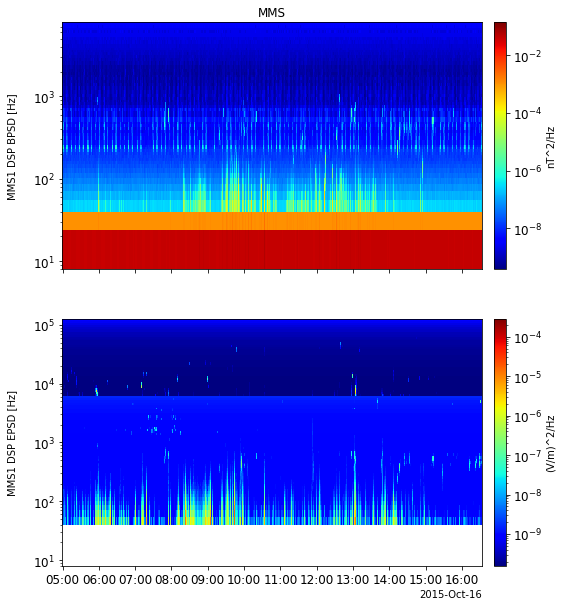

In [ ]:
tplot(['mms1_dsp_bpsd_omni_fast_l2', 'mms1_dsp_epsd_omni'])

You can also use `options` to set various plot options for a specific variable, e.g., to set the range for a specific axis (y and z)


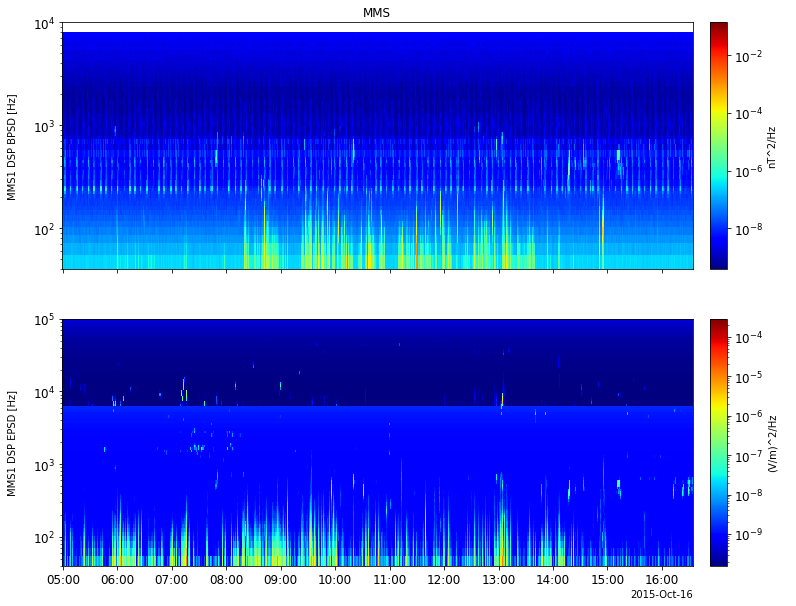

In [ ]:
options('mms1_dsp_bpsd_omni_fast_l2', 'yrange', [40, 10000])
options('mms1_dsp_epsd_omni', 'yrange', [40, 100000])

tplot(['mms1_dsp_bpsd_omni_fast_l2', 'mms1_dsp_epsd_omni'], xsize=12)

### ASPOC

To load ASPOC data

In [ ]:
pyspedas.projects.mms.aspoc(trange=['2015-10-16', '2015-10-17'])

01-Dec-21 17:55:19: Downloading mms1_aspoc_srvy_l2_20151016_v2.0.0.cdf to pydata/mms1/aspoc/srvy/l2/2015/10


Loaded variables:
Epoch_l2
mms1_aspoc_ionc_l2
mms1_asp1_ionc_l2
mms1_asp2_ionc_l2
mms1_asp1_energy_l2
mms1_asp2_energy_l2
mms1_aspoc_status_l2


['Epoch_l2',
 'mms1_aspoc_ionc_l2',
 'mms1_asp1_ionc_l2',
 'mms1_asp2_ionc_l2',
 'mms1_asp1_energy_l2',
 'mms1_asp2_energy_l2',
 'mms1_aspoc_status_l2']

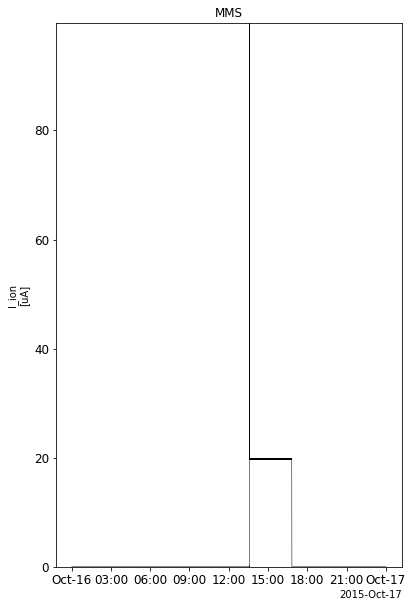

In [ ]:
tplot('mms1_aspoc_ionc_l2')

## EPD (FEEPS/EIS) Data



### FEEPS

In [ ]:
pyspedas.projects.mms.feeps(datatype='electron', trange=['2015-10-16', '2015-10-17'], data_rate='srvy', probe=4)

01-Dec-21 17:55:40: Downloading mms4_feeps_srvy_l2_electron_20151016000000_v6.1.2.cdf to pydata/mms4/feeps/srvy/l2/electron/2015/10


The lengths of x and y do not match!
electron_energy is currently not in pytplot.
electron_energy is currently not in pytplot.
electron_energy is currently not in pytplot.
The lengths of x and y do not match!
electron_energy_lower_bound is currently not in pytplot.
electron_energy_lower_bound is currently not in pytplot.
electron_energy_lower_bound is currently not in pytplot.
The lengths of x and y do not match!
electron_energy_upper_bound is currently not in pytplot.
electron_energy_upper_bound is currently not in pytplot.
electron_energy_upper_bound is currently not in pytplot.
Loaded variables:
mms4_epd_feeps_srvy_l2_electron_top_intensity_sensorid_1
mms4_epd_feeps_srvy_l2_electron_top_intensity_sensorid_2
mms4_epd_feeps_srvy_l2_electron_top_intensity_sensorid_3
mms4_epd_feeps_srvy_l2_electron_top_intensity_sensorid_4
mms4_epd_feeps_srvy_l2_electron_top_intensity_sensorid_5
mms4_epd_feeps_srvy_l2_electron_top_intensity_sensorid_9
mms4_epd_feeps_srvy_l2_electron_top_intensity_sensor

['mms4_epd_feeps_srvy_l2_electron_top_intensity_sensorid_1',
 'mms4_epd_feeps_srvy_l2_electron_top_intensity_sensorid_2',
 'mms4_epd_feeps_srvy_l2_electron_top_intensity_sensorid_3',
 'mms4_epd_feeps_srvy_l2_electron_top_intensity_sensorid_4',
 'mms4_epd_feeps_srvy_l2_electron_top_intensity_sensorid_5',
 'mms4_epd_feeps_srvy_l2_electron_top_intensity_sensorid_9',
 'mms4_epd_feeps_srvy_l2_electron_top_intensity_sensorid_10',
 'mms4_epd_feeps_srvy_l2_electron_top_intensity_sensorid_11',
 'mms4_epd_feeps_srvy_l2_electron_top_intensity_sensorid_12',
 'mms4_epd_feeps_srvy_l2_electron_bottom_intensity_sensorid_1',
 'mms4_epd_feeps_srvy_l2_electron_bottom_intensity_sensorid_2',
 'mms4_epd_feeps_srvy_l2_electron_bottom_intensity_sensorid_3',
 'mms4_epd_feeps_srvy_l2_electron_bottom_intensity_sensorid_4',
 'mms4_epd_feeps_srvy_l2_electron_bottom_intensity_sensorid_5',
 'mms4_epd_feeps_srvy_l2_electron_bottom_intensity_sensorid_9',
 'mms4_epd_feeps_srvy_l2_electron_bottom_intensity_sensorid_10',

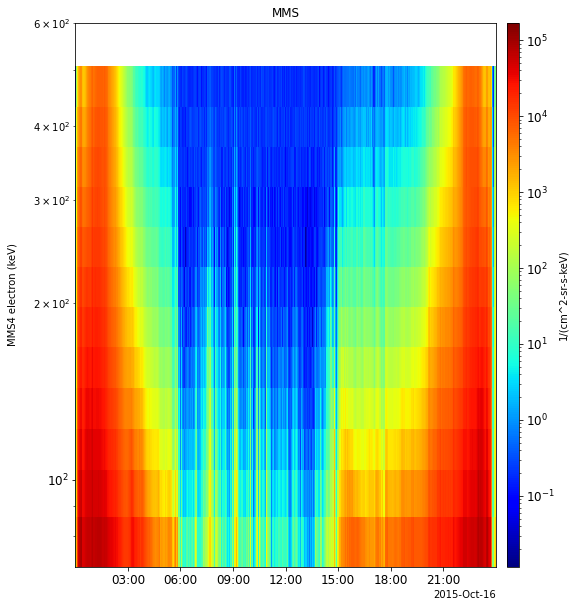

In [ ]:
tplot('mms4_epd_feeps_srvy_l2_electron_intensity_omni_spin')

In [ ]:
data = get_data('mms4_epd_feeps_srvy_l2_electron_intensity_omni_spin')

In [ ]:
data.v.shape

(15,)

In [ ]:
data.v

array([ 30.2,  48.9,  67.6,  86.4, 104.1, 122.2, 143.5, 168.3, 197.2,
       231. , 270.4, 316.4, 370.2, 433. , 506.2])

In [ ]:
data.y.shape

(2819, 15)

In [ ]:
data.y[1002, :]

array([6.25630291e+04, 7.04517870e+02, 4.20011220e+01, 3.01091405e+01,
       2.28262531e+01, 9.61112821e+00, 4.48426150e+00, 2.13896229e+00,
       1.07450111e+00, 4.77941359e-01, 3.22600710e-01, 3.14489080e-01,
       2.64507463e-01, 2.15985587e-01, 1.75670240e-01])

In [ ]:
data.times[1002]
time_string(data.times[1002])

'2015-10-16 08:57:47.388928'

Calculate FEEPS pitch angle distributions

In [ ]:
from pyspedas import mms_feeps_pad

mms_feeps_pad(probe=4)

01-Dec-21 17:56:06: Downloading mms4_fgm_srvy_l2_20151016_v4.18.0.cdf to pydata/mms4/fgm/srvy/l2/2015/10


That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
mms4_fgm_b_bcs_srvy_l2
mms4_fgm_b_bcs_srvy_l2_bvec
mms4_fgm_b_bcs_srvy_l2_btot
That name is currently not in pytplot


['mms4_epd_feeps_srvy_l2_electron_intensity_70-600keV_pad',
 'mms4_epd_feeps_srvy_l2_electron_intensity_70-600keV_pad_spin']

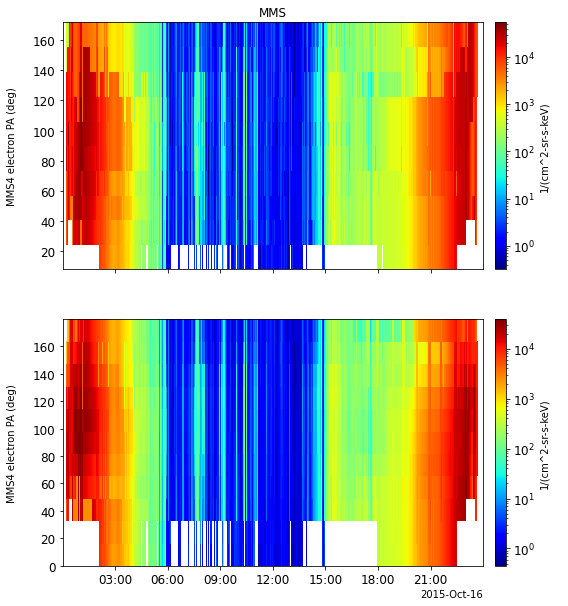

In [ ]:
tplot(['mms4_epd_feeps_srvy_l2_electron_intensity_70-600keV_pad',
 'mms4_epd_feeps_srvy_l2_electron_intensity_70-600keV_pad_spin'])

### EIS

To load EIS data:

In [ ]:
pyspedas.projects.mms.eis(datatype=['extof', 'phxtof'],
                 trange=['2016-11-23', '2016-11-24'], 
                 data_rate='srvy', 
                 probe=4)

01-Dec-21 17:56:31: Downloading mms4_epd-eis_srvy_l2_extof_20161123_v4.1.100.cdf to pydata/mms4/epd-eis/srvy/l2/extof/2016/11
01-Dec-21 17:56:33: Downloading mms4_epd-eis_srvy_l2_phxtof_20161123_v4.1.100.cdf to pydata/mms4/epd-eis/srvy/l2/phxtof/2016/11
01-Dec-21 17:57:02: Problem calculating the spin-average for species: alpha (extof)
01-Dec-21 17:57:02: Error, problem finding the telescopes to calculate omni-directional spectrograms
01-Dec-21 17:57:03: Error, problem finding the telescopes to calculate omni-directional spectrograms


That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
Time_Minus
Time_Plus
mms4_epd_eis_srvy_l2_extof_duration
mms4_epd_eis_srvy_l2_extof_deadtime
mms4_epd_eis_srvy_l2_extof_largepixel
mms4_epd_eis_srvy_l2_extof_starttai
mms4_epd_eis_srvy_l2_extof_midtai
mms4_epd_eis_srvy_l2_extof_endtai
mms4_epd_eis_srvy_l2_extof_spin
mms4_epd_eis_srvy_l2_extof_sector
mms4_epd_eis_srvy_l2_extof_quality
mms4_epd_eis_srvy_l2_extof_proton_P4_counts_t0
mms4_epd_eis_srvy_l2_extof_proton_P4_counts_t1
mms4_epd_eis_srvy_l2_extof_proton_P4_counts_t2
mms4_epd_eis_srvy_l2_extof_proton_P4_counts

['Epoch',
 'Time_Minus',
 'Time_Plus',
 'mms4_epd_eis_srvy_l2_extof_duration',
 'mms4_epd_eis_srvy_l2_extof_deadtime',
 'mms4_epd_eis_srvy_l2_extof_largepixel',
 'mms4_epd_eis_srvy_l2_extof_starttai',
 'mms4_epd_eis_srvy_l2_extof_midtai',
 'mms4_epd_eis_srvy_l2_extof_endtai',
 'mms4_epd_eis_srvy_l2_extof_spin',
 'mms4_epd_eis_srvy_l2_extof_sector',
 'mms4_epd_eis_srvy_l2_extof_quality',
 'mms4_epd_eis_srvy_l2_extof_proton_P4_counts_t0',
 'mms4_epd_eis_srvy_l2_extof_proton_P4_counts_t1',
 'mms4_epd_eis_srvy_l2_extof_proton_P4_counts_t2',
 'mms4_epd_eis_srvy_l2_extof_proton_P4_counts_t3',
 'mms4_epd_eis_srvy_l2_extof_proton_P4_counts_t4',
 'mms4_epd_eis_srvy_l2_extof_proton_P4_counts_t5',
 'mms4_epd_eis_srvy_l2_extof_proton_P4_cps_t0',
 'mms4_epd_eis_srvy_l2_extof_proton_P4_cps_t1',
 'mms4_epd_eis_srvy_l2_extof_proton_P4_cps_t2',
 'mms4_epd_eis_srvy_l2_extof_proton_P4_cps_t3',
 'mms4_epd_eis_srvy_l2_extof_proton_P4_cps_t4',
 'mms4_epd_eis_srvy_l2_extof_proton_P4_cps_t5',
 'mms4_epd_eis_s

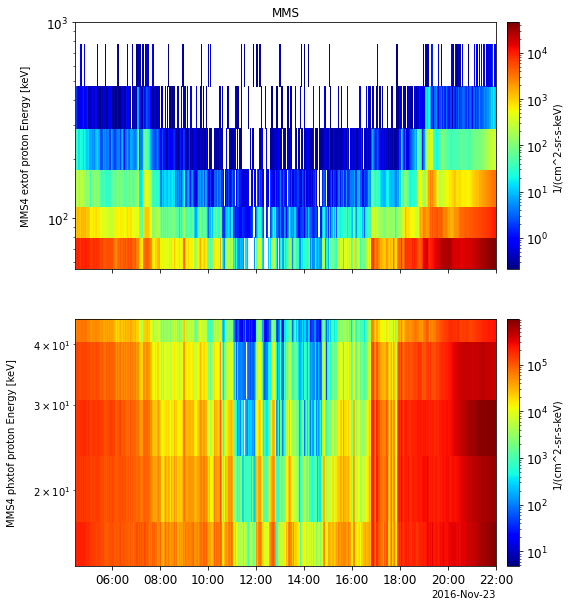

In [ ]:
tplot(['mms4_epd_eis_srvy_l2_extof_proton_flux_omni_spin',
       'mms4_epd_eis_srvy_l2_phxtof_proton_flux_omni_spin'])

Calculate the EIS pitch angle distributions

In [ ]:
from pyspedas import mms_eis_pad

mms_eis_pad(probe=4, datatype='phxtof')

01-Dec-21 17:57:13: Calculating the EIS pitch angle distribution; this may take several minutes


['mms4_epd_eis_srvy_l2_extof_44_65keV_proton_flux_omni_pad',
 'mms4_epd_eis_srvy_l2_extof_66_95keV_proton_flux_omni_pad',
 'mms4_epd_eis_srvy_l2_extof_95_138keV_proton_flux_omni_pad',
 'mms4_epd_eis_srvy_l2_extof_138_225keV_proton_flux_omni_pad',
 'mms4_epd_eis_srvy_l2_extof_226_368keV_proton_flux_omni_pad',
 'mms4_epd_eis_srvy_l2_extof_368_599keV_proton_flux_omni_pad',
 'mms4_epd_eis_srvy_l2_extof_599_979keV_proton_flux_omni_pad',
 'mms4_epd_eis_srvy_l2_extof_proton_flux_omni_pads',
 'mms4_epd_eis_srvy_l2_extof_44-979keV_proton_flux_omni_pad',
 'mms4_epd_eis_srvy_l2_extof_44_65keV_proton_flux_omni_pad_spin',
 'mms4_epd_eis_srvy_l2_extof_66_95keV_proton_flux_omni_pad_spin',
 'mms4_epd_eis_srvy_l2_extof_95_138keV_proton_flux_omni_pad_spin',
 'mms4_epd_eis_srvy_l2_extof_138_225keV_proton_flux_omni_pad_spin',
 'mms4_epd_eis_srvy_l2_extof_226_368keV_proton_flux_omni_pad_spin',
 'mms4_epd_eis_srvy_l2_extof_368_599keV_proton_flux_omni_pad_spin',
 'mms4_epd_eis_srvy_l2_extof_599_979keV_proton

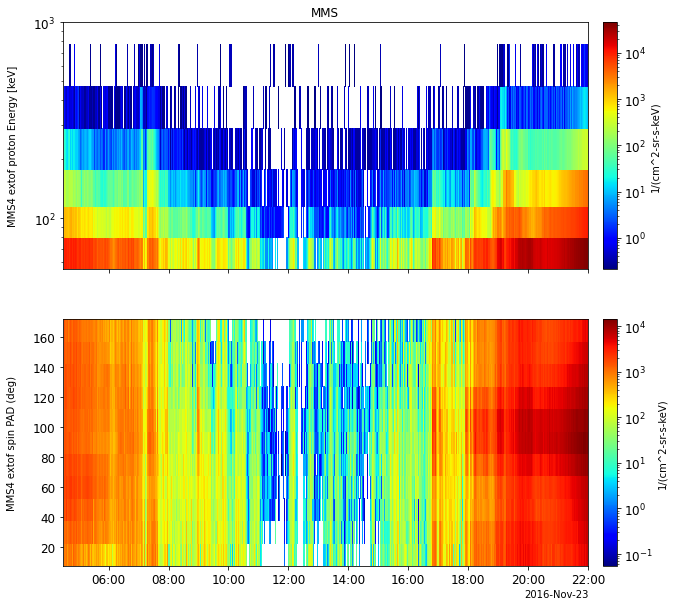

In [ ]:
tplot(['mms4_epd_eis_srvy_l2_extof_proton_flux_omni_spin',
       'mms4_epd_eis_srvy_l2_extof_44-979keV_proton_flux_omni_pad_spin'], xsize=10)

## Plasma (FPI/HPCA) data

### FPI

In [ ]:
pyspedas.projects.mms.fpi(center_measurement=True,
                 datatype=['dis-moms', 'des-moms'], 
                 trange=['2016-11-23', '2016-11-24'], 
                 probe=4)

01-Dec-21 17:57:42: Downloading mms4_fpi_fast_l2_dis-moms_20161123060000_v3.3.0.cdf to pydata/mms4/fpi/fast/l2/dis-moms/2016/11
01-Dec-21 17:57:43: Downloading mms4_fpi_fast_l2_dis-moms_20161123080000_v3.3.0.cdf to pydata/mms4/fpi/fast/l2/dis-moms/2016/11
01-Dec-21 17:57:43: Downloading mms4_fpi_fast_l2_dis-moms_20161123100000_v3.3.0.cdf to pydata/mms4/fpi/fast/l2/dis-moms/2016/11
01-Dec-21 17:57:43: Downloading mms4_fpi_fast_l2_dis-moms_20161123120000_v3.3.0.cdf to pydata/mms4/fpi/fast/l2/dis-moms/2016/11
01-Dec-21 17:57:43: Downloading mms4_fpi_fast_l2_dis-moms_20161123140000_v3.3.0.cdf to pydata/mms4/fpi/fast/l2/dis-moms/2016/11
01-Dec-21 17:57:43: Downloading mms4_fpi_fast_l2_dis-moms_20161123160000_v3.3.0.cdf to pydata/mms4/fpi/fast/l2/dis-moms/2016/11
01-Dec-21 17:57:43: Downloading mms4_fpi_fast_l2_dis-moms_20161123180000_v3.3.0.cdf to pydata/mms4/fpi/fast/l2/dis-moms/2016/11
01-Dec-21 17:57:44: Downloading mms4_fpi_fast_l2_des-moms_20161123060000_v3.3.0.cdf to pydata/mms4/fpi/f

That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
Epoch_plus_var
Epoch_minus_var
mms4_des_errorflags_fast
mms4_des_compressionloss_fast
mms4_des_startdelphi_count_fast
mms4_des_startdelphi_angle_fast
mms4_des_pitchangdist_lowen_fast
mms4_des_pitchangdist_miden_fast
mms4_des_pitchangdist_highen_fast
mms4_des_energyspectr_px_fast
mms4_des_energyspectr_mx_fast
mms4_des_energyspectr_py_fast
mms4_des_energyspectr_my_fast
mms4_des_energyspectr_pz_fast
mms4_des_energyspectr_mz_fast
mms4_des_energyspectr_par_fast
mms4_des_energyspectr_anti_fast
mms4_des_energyspectr_perp_fast
mms4_des_energyspectr_omni_fast
mms4_des_numberdensity_fast
mms4_des_numberdensity_err_fast
mms4_des_densityextrapolation_low_fast
mms4_des_densityextrapolation_high_fast
mms4_des_bulkv_dbcs_fast
mms4_des_bulkv_spintone_dbcs_fast
mms4_des_bulkv_gse_fast
mms4_des_bulkv_spintone_gse_fast
mms4_des_bulkv_err_fast
mms4_des_prestensor_dbcs_f

['Epoch',
 'Epoch_plus_var',
 'Epoch_minus_var',
 'mms4_des_errorflags_fast',
 'mms4_des_compressionloss_fast',
 'mms4_des_startdelphi_count_fast',
 'mms4_des_startdelphi_angle_fast',
 'mms4_des_pitchangdist_lowen_fast',
 'mms4_des_pitchangdist_miden_fast',
 'mms4_des_pitchangdist_highen_fast',
 'mms4_des_energyspectr_px_fast',
 'mms4_des_energyspectr_mx_fast',
 'mms4_des_energyspectr_py_fast',
 'mms4_des_energyspectr_my_fast',
 'mms4_des_energyspectr_pz_fast',
 'mms4_des_energyspectr_mz_fast',
 'mms4_des_energyspectr_par_fast',
 'mms4_des_energyspectr_anti_fast',
 'mms4_des_energyspectr_perp_fast',
 'mms4_des_energyspectr_omni_fast',
 'mms4_des_numberdensity_fast',
 'mms4_des_numberdensity_err_fast',
 'mms4_des_densityextrapolation_low_fast',
 'mms4_des_densityextrapolation_high_fast',
 'mms4_des_bulkv_dbcs_fast',
 'mms4_des_bulkv_spintone_dbcs_fast',
 'mms4_des_bulkv_gse_fast',
 'mms4_des_bulkv_spintone_gse_fast',
 'mms4_des_bulkv_err_fast',
 'mms4_des_prestensor_dbcs_fast',
 'mms4_d

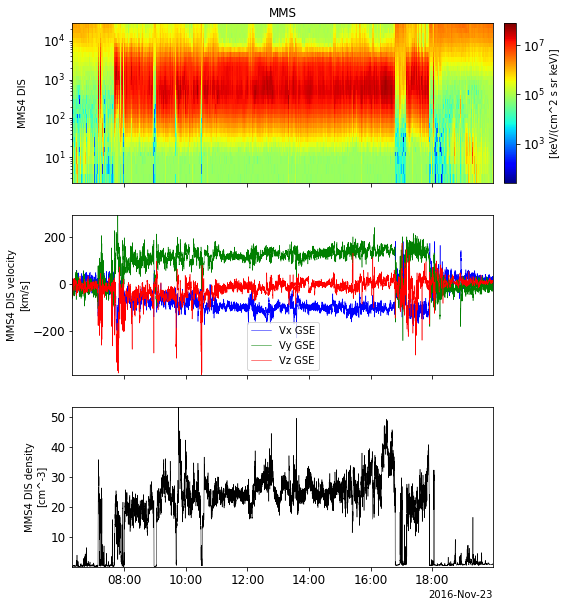

In [ ]:
tplot(['mms4_dis_energyspectr_omni_fast',
       'mms4_dis_bulkv_gse_fast',
       'mms4_dis_numberdensity_fast'])

Note: you can change the vertical spacing between the plots with the 'vertical_spacing' option in `tplot_options`

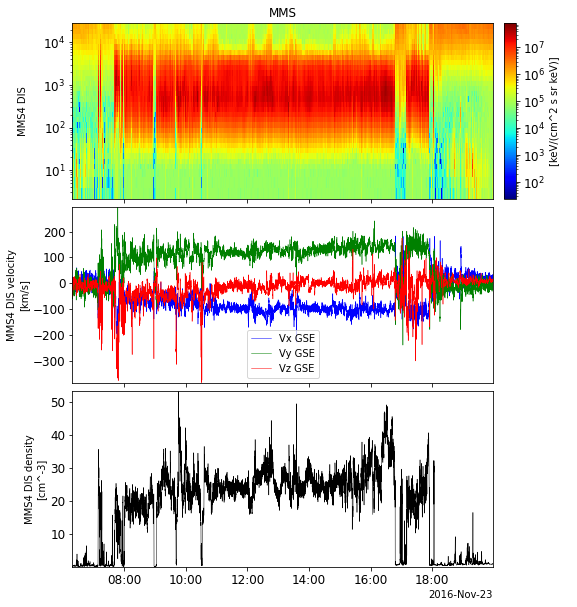

In [ ]:
tplot_options('vertical_spacing', 0.05)

tplot(['mms4_dis_energyspectr_omni_fast',
       'mms4_dis_bulkv_gse_fast',
       'mms4_dis_numberdensity_fast'])

### HPCA

In [ ]:
pyspedas.projects.mms.hpca(center_measurement=True, trange=['2016-11-23', '2016-11-24'], datatype='moments', probe=4)

01-Dec-21 17:58:16: Downloading mms4_hpca_srvy_l2_moments_20161123000000_v4.1.0.cdf to pydata/mms4/hpca/srvy/l2/moments/2016/11
01-Dec-21 17:58:16: Downloading mms4_hpca_srvy_l2_moments_20161123034600_v4.1.0.cdf to pydata/mms4/hpca/srvy/l2/moments/2016/11
01-Dec-21 17:58:16: Downloading mms4_hpca_srvy_l2_moments_20161123060000_v4.1.0.cdf to pydata/mms4/hpca/srvy/l2/moments/2016/11
01-Dec-21 17:58:17: Downloading mms4_hpca_srvy_l2_moments_20161123120000_v4.1.0.cdf to pydata/mms4/hpca/srvy/l2/moments/2016/11
01-Dec-21 17:58:17: Downloading mms4_hpca_srvy_l2_moments_20161123180000_v4.1.0.cdf to pydata/mms4/hpca/srvy/l2/moments/2016/11
01-Dec-21 17:58:17: Downloading mms4_hpca_srvy_l2_moments_20161123223600_v4.1.0.cdf to pydata/mms4/hpca/srvy/l2/moments/2016/11


Loaded variables:
Epoch
Epoch_MINUS
Epoch_PLUS
mms4_hpca_spin_number
mms4_hpca_ion_energy
mms4_hpca_sweep_table_number
mms4_hpca_science_mode
mms4_hpca_hplus_number_density
mms4_hpca_hplus_ion_bulk_velocity
mms4_hpca_hplus_scalar_temperature
mms4_hpca_hplus_ion_pressure
mms4_hpca_hplus_temperature_tensor
mms4_hpca_heplus_number_density
mms4_hpca_heplus_ion_bulk_velocity
mms4_hpca_heplus_scalar_temperature
mms4_hpca_heplus_ion_pressure
mms4_hpca_heplus_temperature_tensor
mms4_hpca_heplusplus_number_density
mms4_hpca_heplusplus_ion_bulk_velocity
mms4_hpca_heplusplus_scalar_temperature
mms4_hpca_heplusplus_ion_pressure
mms4_hpca_heplusplus_temperature_tensor
mms4_hpca_oplus_number_density
mms4_hpca_oplus_ion_bulk_velocity
mms4_hpca_oplus_scalar_temperature
mms4_hpca_oplus_ion_pressure
mms4_hpca_oplus_temperature_tensor
mms4_hpca_B_GSE_spin_avg
mms4_hpca_B_GSM_spin_avg
mms4_hpca_hplus_ion_bulk_velocity_GSM
mms4_hpca_hplus_tperp
mms4_hpca_hplus_tparallel
mms4_hpca_hplus_vperp
mms4_hpca_hplu

['Epoch',
 'Epoch_MINUS',
 'Epoch_PLUS',
 'mms4_hpca_spin_number',
 'mms4_hpca_ion_energy',
 'mms4_hpca_sweep_table_number',
 'mms4_hpca_science_mode',
 'mms4_hpca_hplus_number_density',
 'mms4_hpca_hplus_ion_bulk_velocity',
 'mms4_hpca_hplus_scalar_temperature',
 'mms4_hpca_hplus_ion_pressure',
 'mms4_hpca_hplus_temperature_tensor',
 'mms4_hpca_heplus_number_density',
 'mms4_hpca_heplus_ion_bulk_velocity',
 'mms4_hpca_heplus_scalar_temperature',
 'mms4_hpca_heplus_ion_pressure',
 'mms4_hpca_heplus_temperature_tensor',
 'mms4_hpca_heplusplus_number_density',
 'mms4_hpca_heplusplus_ion_bulk_velocity',
 'mms4_hpca_heplusplus_scalar_temperature',
 'mms4_hpca_heplusplus_ion_pressure',
 'mms4_hpca_heplusplus_temperature_tensor',
 'mms4_hpca_oplus_number_density',
 'mms4_hpca_oplus_ion_bulk_velocity',
 'mms4_hpca_oplus_scalar_temperature',
 'mms4_hpca_oplus_ion_pressure',
 'mms4_hpca_oplus_temperature_tensor',
 'mms4_hpca_B_GSE_spin_avg',
 'mms4_hpca_B_GSM_spin_avg',
 'mms4_hpca_hplus_ion_bu

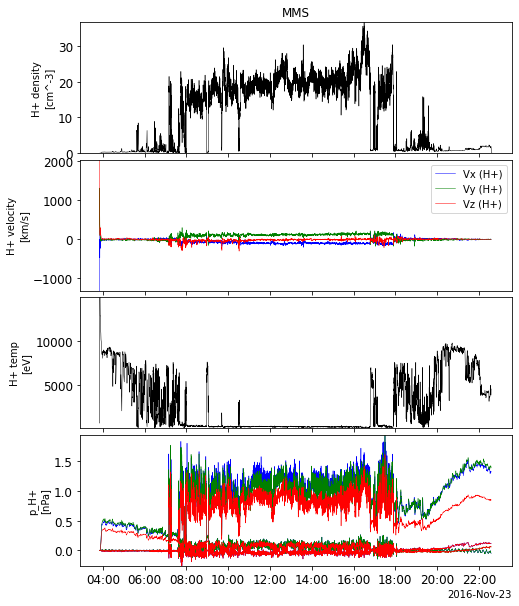

In [ ]:
tplot(['mms4_hpca_hplus_number_density',
       'mms4_hpca_hplus_ion_bulk_velocity',
       'mms4_hpca_hplus_scalar_temperature',
       'mms4_hpca_hplus_ion_pressure'], xsize=10)

In [ ]:
m = get_data('mms4_hpca_hplus_ion_pressure', metadata=True)

In [ ]:
m['CDF']['VATT']

{'CATDESC': 'Ion Pressure Tensor Hydrogen+ for each HPCA half-spin (xx,yx,zx,xy,yy,zy,xz,yz,zz)',
 'COORDINATE_SYSTEM': 'DBCS',
 'DEPEND_0': 'Epoch',
 'DISPLAY_TYPE': 'time_series',
 'FIELDNAM': 'Ion Pressure Tensor Hydrogen+',
 'FILLVAL': array([-1.e+31]),
 'FORMAT': '%13.6e',
 'LABLAXIS': 'p_H+',
 'REPRESENTATION_1': 'x,y,z',
 'REPRESENTATION_2': 'x,y,z',
 'SI_CONVERSION': '1.0e-9>Pa',
 'TENSOR_ORDER': '2',
 'UNITS': 'nPa',
 'VALIDMAX': array([6.409]),
 'VALIDMIN': array([0.0001602]),
 'VAR_TYPE': 'data'}

In [ ]:
pyspedas.projects.mms.hpca(center_measurement=True, trange=['2016-11-23/12:00', '2016-11-23/13:00'], datatype='ion', probe=4, time_clip=True)

01-Dec-21 17:58:34: Downloading mms4_hpca_srvy_l2_ion_20161123060000_v4.1.0.cdf to pydata/mms4/hpca/srvy/l2/ion/2016/11
01-Dec-21 17:58:41: Downloading mms4_hpca_srvy_l2_ion_20161123120000_v4.1.0.cdf to pydata/mms4/hpca/srvy/l2/ion/2016/11


Time clip was applied to: mms4_hpca_azimuth_decimation_factor
Time clip was applied to: mms4_hpca_polar_decimation_factor
Time clip was applied to: mms4_hpca_energy_decimation_factor
Time clip was applied to: mms4_hpca_sweep_table_number
Time clip was applied to: mms4_hpca_start_azimuth
Time clip was applied to: mms4_hpca_science_mode
Time clip was applied to: mms4_hpca_hplus_flux
Time clip was applied to: mms4_hpca_hplus_phase_space_density
Time clip was applied to: mms4_hpca_heplus_flux
Time clip was applied to: mms4_hpca_heplus_phase_space_density
Time clip was applied to: mms4_hpca_heplusplus_flux
Time clip was applied to: mms4_hpca_heplusplus_phase_space_density
Time clip was applied to: mms4_hpca_oplus_flux
Time clip was applied to: mms4_hpca_oplus_phase_space_density
Time clip was applied to: mms4_hpca_B_GSE_sweep_avg
Time clip was applied to: mms4_hpca_B_GSM_sweep_avg
Time clip was applied to: mms4_hpca_azimuth_angles_degrees
Time clip was applied to: mms4_hpca_azimuth_angles_p

['Epoch',
 'Epoch_MINUS',
 'Epoch_PLUS',
 'mms4_hpca_polar_anode_number',
 'mms4_hpca_azimuth_decimation_factor',
 'mms4_hpca_polar_decimation_factor',
 'mms4_hpca_energy_decimation_factor',
 'mms4_hpca_sweep_table_number',
 'mms4_hpca_start_azimuth',
 'mms4_hpca_science_mode',
 'mms4_hpca_ion_energy',
 'mms4_hpca_hplus_flux',
 'mms4_hpca_hplus_phase_space_density',
 'mms4_hpca_heplus_flux',
 'mms4_hpca_heplus_phase_space_density',
 'mms4_hpca_heplusplus_flux',
 'mms4_hpca_heplusplus_phase_space_density',
 'mms4_hpca_oplus_flux',
 'mms4_hpca_oplus_phase_space_density',
 'mms4_hpca_B_GSE_sweep_avg',
 'mms4_hpca_B_GSM_sweep_avg',
 'Epoch_Angles',
 'Epoch_MINUS_Angles',
 'Epoch_PLUS_Angles',
 'mms4_hpca_azimuth_angles_degrees',
 'mms4_hpca_azimuth_angles_per_ev_degrees',
 'mms4_hpca_centroid_elevation_angle',
 'mms4_hpca_azimuth_index',
 'mms4_hpca_energy_step_number',
 'mms4_hpca_MCP_VMON_MIN_converted',
 'mms4_hpca_TOF_VMON_MIN_converted',
 'mms4_hpca_decimation_factor_index',
 'mms4_hp

In [ ]:
from pyspedas import mms_hpca_calc_anodes
from pyspedas import mms_hpca_spin_sum

The HPCA flux and PSD data are stored as a function of energy and angle; to calculate an omni-directional data product, you have to average over the FoV and spin-average


In [ ]:
mms_hpca_calc_anodes(probe=4, fov=[0, 360])

['mms4_hpca_hplus_flux_elev_0-360',
 'mms4_hpca_heplus_flux_elev_0-360',
 'mms4_hpca_heplusplus_flux_elev_0-360',
 'mms4_hpca_oplus_flux_elev_0-360']

In [ ]:
mms_hpca_spin_sum(probe=4, avg=True)

['mms4_hpca_hplus_flux_elev_0-360_spin',
 'mms4_hpca_heplus_flux_elev_0-360_spin',
 'mms4_hpca_heplusplus_flux_elev_0-360_spin',
 'mms4_hpca_oplus_flux_elev_0-360_spin']

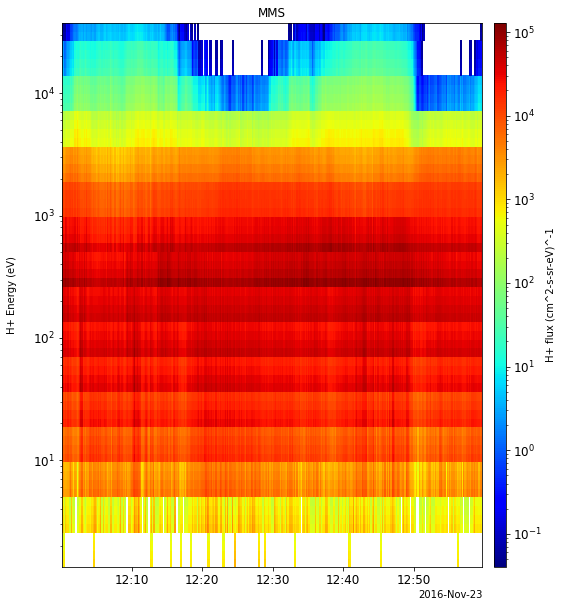

In [ ]:
tplot('mms4_hpca_hplus_flux_elev_0-360_spin')

### Calculating plasma parameters

We have a notebook that shows how to do various plasma calculations using MMS data and the `plasmapy` package, available at:

https://github.com/spedas/mms-examples/blob/master/advanced/Plasma%20calculations%20with%20PlasmaPy.ipynb


This includes examples of calculating plasma beta, Alfvén speed, ion inertial length, ion gyroradius, upper and lower hybrid frequencies, etc. 

### Generating spectra and moments using mms_part_getspec

Note: this is still experimental

In [ ]:
from pyspedas.projects.mms.particles.mms_part_getspec import mms_part_getspec

In [ ]:
mms_part_getspec(output=['energy', 'theta', 'phi', 'pa', 'gyro', 'moments'], 
                 probe=4, 
                 instrument='hpca',
                 species='hplus', 
                 trange=['2016-11-23/12:00', '2016-11-23/13:00'])

30-Nov-21 23:24:29: Downloading mms4_fpi_fast_l2_dis-dist_20161123100000_v3.3.0.cdf to pydata/mms4/fpi/fast/l2/dis-dist/2016/11
30-Nov-21 23:24:33: Downloading mms4_fpi_fast_l2_dis-dist_20161123120000_v3.3.0.cdf to pydata/mms4/fpi/fast/l2/dis-dist/2016/11


Time clip was applied to: mms4_dis_errorflags_fast
Time clip was applied to: mms4_dis_startdelphi_count_fast
Time clip was applied to: mms4_dis_startdelphi_angle_fast
Time clip was applied to: mms4_dis_dist_fast
Time clip was applied to: mms4_dis_disterr_fast
Time clip was applied to: mms4_dis_energy_fast
Time clip was applied to: mms4_dis_energy_delta_fast
That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
Epoch_plus_var
Epoch_minus_var
mms4_dis_errorflags_fast
mms4_dis_compressionloss_fast
mms4_dis_startdelphi_count_fast
mms4_dis_startdelphi_angle_fast
mms4_dis_dist_fast
mms4_dis_disterr_fast
mms4_dis_theta_fast
mms4_dis_theta_delta_fast
mms4_dis_energy_fast
mms4_dis_energy_delta_fast
mms4_dis_phi_fast
mms4_dis_phi_delta_fast


30-Nov-21 23:24:42: Downloading mms4_mec_srvy_l2_epht89q_20161123_v2.0.1.cdf to pydata/mms4/mec/srvy/l2/epht89q/2016/11


Time clip was applied to: mms4_mec_dipole_tilt
Time clip was applied to: mms4_mec_gmst
Time clip was applied to: mms4_mec_mlat
Time clip was applied to: mms4_mec_mlt
Time clip was applied to: mms4_mec_l_dipole
Time clip was applied to: mms4_mec_quat_eci_to_bcs
Time clip was applied to: mms4_mec_quat_eci_to_dbcs
Time clip was applied to: mms4_mec_quat_eci_to_dmpa
Time clip was applied to: mms4_mec_quat_eci_to_smpa
Time clip was applied to: mms4_mec_quat_eci_to_dsl
Time clip was applied to: mms4_mec_quat_eci_to_ssl
Time clip was applied to: mms4_mec_L_vec
Time clip was applied to: mms4_mec_Z_vec
Time clip was applied to: mms4_mec_P_vec
Time clip was applied to: mms4_mec_L_phase
Time clip was applied to: mms4_mec_Z_phase
Time clip was applied to: mms4_mec_P_phase
Time clip was applied to: mms4_mec_kp
Time clip was applied to: mms4_mec_dst
Time clip was applied to: mms4_mec_earth_eclipse_flag
Time clip was applied to: mms4_mec_moon_eclipse_flag
Time clip was applied to: mms4_mec_r_eci
Time

30-Nov-21 23:24:46: Downloading mms4_fgm_srvy_l2_20161123_v5.87.0.cdf to pydata/mms4/fgm/srvy/l2/2016/11


Time clip was applied to: mms4_fgm_b_gse_srvy_l2
Time clip was applied to: mms4_fgm_b_gsm_srvy_l2
Time clip was applied to: mms4_fgm_b_dmpa_srvy_l2
Time clip was applied to: mms4_fgm_b_bcs_srvy_l2
Time clip was applied to: mms4_fgm_flag_srvy_l2
Time clip was applied to: mms4_fgm_r_gse_srvy_l2
Time clip was applied to: mms4_fgm_r_gsm_srvy_l2
Time clip was applied to: mms4_fgm_hirange_srvy_l2
Time clip was applied to: mms4_fgm_bdeltahalf_srvy_l2
Time clip was applied to: mms4_fgm_stemp_srvy_l2
Time clip was applied to: mms4_fgm_etemp_srvy_l2
Time clip was applied to: mms4_fgm_mode_srvy_l2
Time clip was applied to: mms4_fgm_rdeltahalf_srvy_l2
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms4_fgm_b_gse_srvy_l2
mms4_fgm_b_gsm_srvy_l2
mms4_fgm_b_dmpa_srvy_l2
mms4_fgm_b_bcs_srvy_l2
mms4_fgm_flag_srvy_l2
Epoch_state
mms4_fgm_hirange_srvy_l2
mms4_fgm_bdeltahalf_srvy_l2
mms4_fgm_stemp_srvy_l2
mms4_fgm_etemp_srvy_l2
mms4_fgm_mode_srvy_l2
mms4

30-Nov-21 23:25:07: Downloading mms4_edp_fast_l2_scpot_20161123000000_v2.7.0.cdf to pydata/mms4/edp/fast/l2/scpot/2016/11


Time clip was applied to: mms4_edp_scpot_fast_l2
Loaded variables:
mms4_edp_scpot_fast_l2
['gse', 'gei']
Running transformation: subgse2gei
Output variable: mms4_mec_r_gse
tinterpol (linear) was applied to: mms4_fgm_b_gse_srvy_l2_bvec_pgs_temp
tinterpol (linear) was applied to: mms4_mec_r_gse_pgs_temp
['gei', 'gse']
Running transformation: subgei2gse
Output variable: mms4_mec_r_gse_pgs_temp
tinterpol (linear) was applied to: mms4_fgm_b_gse_srvy_l2_bvec_pgs_temp
tinterpol (linear) was applied to: mms4_edp_scpot_fast_l2_pgs_temp


30-Nov-21 23:25:16: /usr/local/lib/python3.7/dist-packages/pyspedas/particles/moments/moments_3d.py:49: RuntimeWarning: divide by zero encountered in true_divide
  weight = (energy + charge*sc_pot)/de + 0.5

30-Nov-21 23:25:25: mms4_dis_dist_fast is 0% done.
30-Nov-21 23:25:39: mms4_dis_dist_fast is 0% done.
30-Nov-21 23:25:52: mms4_dis_dist_fast is 1% done.
30-Nov-21 23:26:05: mms4_dis_dist_fast is 1% done.
30-Nov-21 23:26:19: mms4_dis_dist_fast is 1% done.
30-Nov-21 23:26:33: mms4_dis_dist_fast is 2% done.
30-Nov-21 23:26:46: mms4_dis_dist_fast is 2% done.
30-Nov-21 23:27:00: mms4_dis_dist_fast is 2% done.
30-Nov-21 23:27:13: mms4_dis_dist_fast is 2% done.
30-Nov-21 23:27:27: mms4_dis_dist_fast is 2% done.
30-Nov-21 23:27:40: mms4_dis_dist_fast is 3% done.
30-Nov-21 23:27:54: mms4_dis_dist_fast is 3% done.
30-Nov-21 23:28:07: mms4_dis_dist_fast is 3% done.
30-Nov-21 23:28:20: mms4_dis_dist_fast is 4% done.
30-Nov-21 23:28:33: mms4_dis_dist_fast is 4% done.
30-Nov-21 23:28:46: mms4_di

['mms4_dis_dist_fast_density',
 'mms4_dis_dist_fast_flux',
 'mms4_dis_dist_fast_mftens',
 'mms4_dis_dist_fast_velocity',
 'mms4_dis_dist_fast_ptens',
 'mms4_dis_dist_fast_vthermal',
 'mms4_dis_dist_fast_avgtemp',
 'mms4_dis_dist_fast_energy',
 'mms4_dis_dist_fast_theta',
 'mms4_dis_dist_fast_phi',
 'mms4_dis_dist_fast_pa',
 'mms4_dis_dist_fast_gyro']

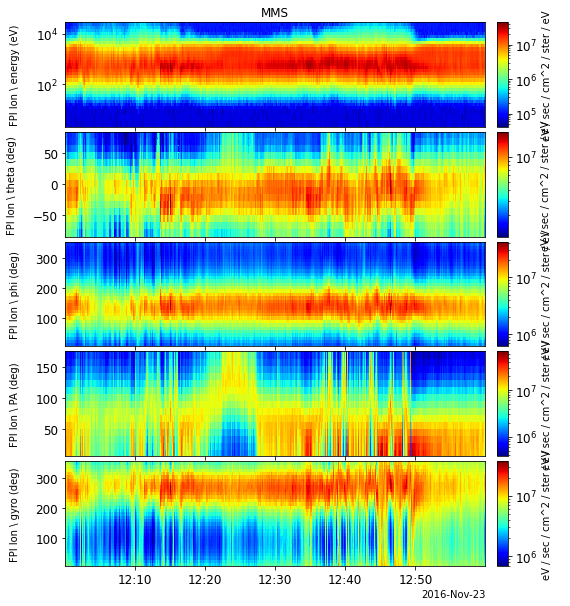

In [ ]:
tplot(['mms4_dis_dist_fast_energy',
       'mms4_dis_dist_fast_theta',
       'mms4_dis_dist_fast_phi',
       'mms4_dis_dist_fast_pa',
       'mms4_dis_dist_fast_gyro'])

## Saving figures

You can save figures using the keywords:

- save_png
- save_eps
- save_svg
- save_pdf

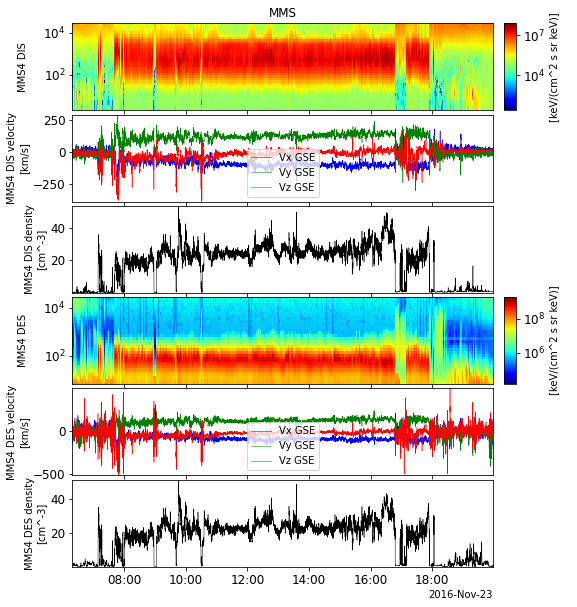

In [ ]:
tplot(['mms4_dis_energyspectr_omni_fast',
       'mms4_dis_bulkv_gse_fast',
       'mms4_dis_numberdensity_fast',
       'mms4_des_energyspectr_omni_fast',
       'mms4_des_bulkv_gse_fast',
       'mms4_des_numberdensity_fast'], save_png='myfile')